# RANDOM FOREST

In [279]:
# LOAD DATA
import pandas as pd
data=df = pd.read_excel('C:/Nagesh Agrawal/A__Data Science/B__Assigment/AAASSINGMENTS DATASETS/glass.xlsx', sheet_name=1)

In [280]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# DATA DESCRIPTION:

**RI :** refractive index.

**Na :** Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10).

**Mg :** Magnesium.

**AI :** Aluminum.

**Si :** Silicon.

**K :** Potassium.

**Ca :** Calcium.

**Ba :** Barium.

**Fe :** Iron.



# TYPE OF GLASS TARGET COLUMNS (CLASSES)
- 1 --> building_windows_float_processed
- 2 --> building_windows_non_float_processed
- 3 --> vehicle_windows_float_processed
- 4 --> vehicle_windows_non_float_processed (none in this database)
- 5 --> containers
- 6 --> tableware
- 7 --> headlamps


In [281]:
# DESCRIBE DATA (SUMMARY OF NUMERICAL COLUMNS)
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [282]:
# INFO ABOUT NOT NULL VALUES AND DTYPE OF COLUMNS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [283]:
# CHECKING DATATYPE OF COLUMNS
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [284]:
# CHECKING FOR NULL VALUES:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [285]:
# DROPING RECORDS WHICH CONTAIN THE NULL VALUES:
data.dropna(inplace=True)

In [286]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [287]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [288]:
# CHECKING DUPLICATE RECORDS
data.duplicated().sum()

1

In [289]:
data[data.duplicated()]#--> by default keep =first

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [290]:
#DROPING DUPLICATE CONSIDERING THE 1ST RECORD AS ORIGINAL
data.drop_duplicates(inplace=True)

In [291]:
data# THE INDEX IS AS IT IS.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [292]:
# TO RESET INDEX :
data.reset_index(drop=True,inplace=True)
# drop=True IT WILL DROP PREVIOUS INDEX.
# inplace=True IT WILL DO PERPENENT CHANGES.

In [293]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# OUTLIERS DETECTION

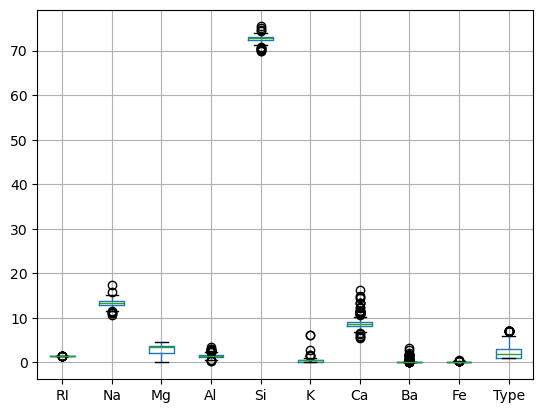

In [294]:
import matplotlib.pyplot as plt
data.boxplot()
plt.show()

# CORRELATION ANALYSIS :

In [295]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


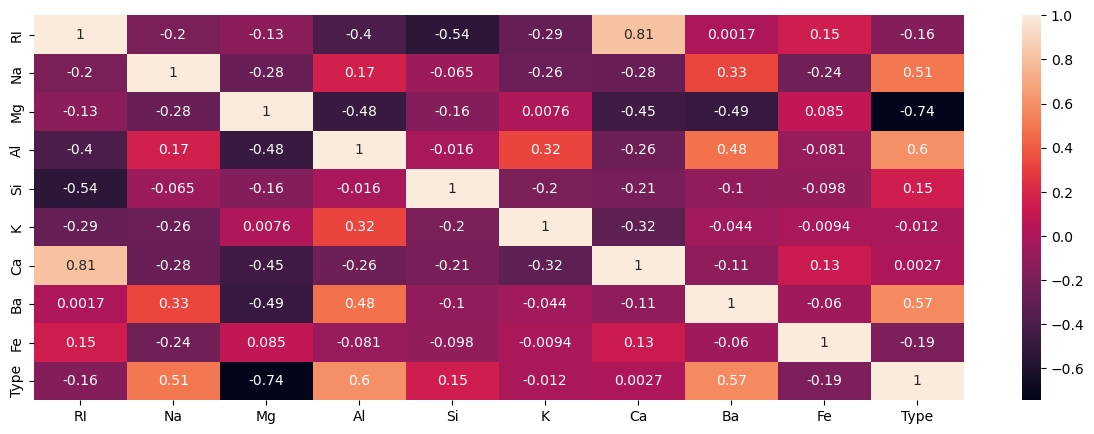

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

# HERE I FOUND THAT :
RI|SI|K|CA|FE HAVING LOW CORRELATION WITH TARGET VARIABLE

**SO I CAN SAY THAT THESE VARIABLE ARE MUCH IMPORTANT FOR PREDICTING TARGET VARIABLE**

# COLLINEARITY BETWEEN X - VARIABLES
**Correlation above 0.50: Indicates a moderate linear relationship between two variables, but it's not always strong enough to be considered problematic for collinearity.**

**0.70 or more is the typical threshold for calling two variables collinear.**
- RI AND CA ARE COLLINEAR


# **COUNT PLOT ON TARGET VARIABLE :**

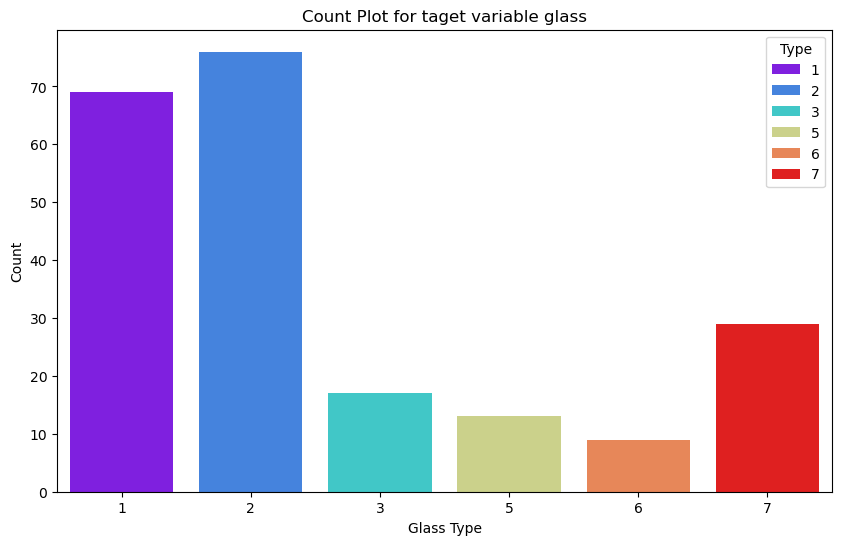

In [297]:
# Count plot for the 'Type' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='Type',hue="Type", data=data, palette='rainbow')
plt.title('Count Plot for taget variable glass')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

# **Types 1 and 2 are the most frequent, while Types 5 and 6 are the least frequent. This imbalance suggests that any classification model built on this dataset may need techniques such as resampling to the imbalance effectively.**

# **Oversampling with SMOTE**

In [298]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [299]:
# SPLITING THE DATA INTO X_VARIABLES AND Y_VARIABLES:
x=data.iloc[:, :-1]
y=data.iloc[:,-1]

In [300]:
# SPLIT THE DATA INTO TRAINING DATA AND TESTING DATA:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [301]:
from imblearn.over_sampling import SMOTE
# CREATING INSTANCE FOR SMOTE:
smote = SMOTE(random_state=1)


In [302]:
# APPLY SMOTE TO TRAINING DATA:
X_RESAMPLED, Y_RESAMPLED = smote.fit_resample(xtrain, ytrain)
#  NOW X_RESAMPLED AND Y RESAMPLED ARE THE BALANCED DATA SET

In [303]:
# CHECKING AND COMPARING THE TARGET VARIABLE DISTRIBUTION :
ytrain.value_counts()

Type
2    63
1    51
7    26
5    12
3    11
6     7
Name: count, dtype: int64

In [304]:
Y_RESAMPLED.value_counts()# HERE THE FREQUENCY OF CLASSES ARE BALANCED

Type
1    63
7    63
2    63
3    63
5    63
6    63
Name: count, dtype: int64

# NOW THE TAGET VARIABLE CLASSES ARE BALANCED . SO I CAN TRAIN THE MODEL ON RESAMPLED DATA


In [305]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [306]:
# CREATING DATA FRAME WITH RESAMPLED DATA:
RESAMPLED_DATA=pd.DataFrame(X_RESAMPLED,columns=x.columns)

In [307]:
RESAMPLED_DATA["y_resampled"]=Y_RESAMPLED

In [308]:
RESAMPLED_DATA

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,y_resampled
0,1.522230,13.210000,3.77,0.790000,71.990000,0.13,10.020000,0.000000,0.000000,1
1,1.515140,14.850000,0.00,2.420000,73.720000,0.00,8.390000,0.560000,0.000000,7
2,1.517210,12.870000,3.48,1.330000,73.040000,0.56,8.430000,0.000000,0.000000,1
3,1.517540,13.390000,3.66,1.190000,72.790000,0.57,8.270000,0.000000,0.110000,1
4,1.517550,12.710000,3.42,1.200000,73.200000,0.59,8.640000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
373,1.516790,14.517833,0.00,2.560808,73.042631,0.00,9.226010,0.593758,0.000000,7
374,1.516154,14.939214,0.00,2.281865,73.297843,0.00,8.715393,0.666764,0.009708,7
375,1.516531,14.852862,0.00,1.944690,73.110000,0.00,8.427258,1.585397,0.000000,7
376,1.516705,14.855389,0.00,1.990000,73.086921,0.00,8.335389,1.654611,0.000000,7


**NOW I HAVE ONLY 378 ROWS AND 10 COLUMN SO HERE :** Ensemble techniques can significantly enhance model performance and stability when working with limited data. They effectively leverage the strengths of multiple models to create a more robust final prediction.

# MODEL BUILDING

In [309]:
# CONVERT DATA INTO ARRAY:
ARRAY=RESAMPLED_DATA.values

# SPLIT ARRAY INTO X VARIABLES AND Y VARIABLE
x=ARRAY[:, :-1]
y=ARRAY[:,-1]

# SPLIT THE DATA INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=1)
# ONLY 10 % DATA FOR TESTING BECUASE THE MINIMUM DATA IS AVAILABLE

In [310]:
# BUILDING RANDOMFORESTCLASSIFIER MODEL:
from sklearn.ensemble import RandomForestClassifier
#create instance
RFC_MODEL=RandomForestClassifier(n_estimators=100,random_state=1,max_features=2)

# PARAMETERS USED IN MODEL:
**n_estimators=100**--->n_estimators=100: This means the model will create 100 decision trees. Each tree is built from a random subset of the data, and having multiple trees helps improve accuracy and reduce overfitting.

**max_features=2**--->max_features=2: When creating each decision tree, the model will randomly select 2 features (or columns) from the dataset at each split. This randomness helps ensure that the trees are diverse, improving the overall model's performance.

**random_state=1**--->random_state=1: This sets a seed for random number generation, ensuring that the results can be reproduced. Using the same random_state will yield the same random selections each time the model is run.

# TO CALCULATE CROSS VALIDATION SCORE

In [311]:
from sklearn.model_selection import KFold
# INSTANCE OF KFOLD:
kfold = KFold(n_splits=10)

# CROSS VALIDATION SCORE
from sklearn.model_selection import cross_val_score
results = cross_val_score(RFC_MODEL, x, y, cv=kfold)

In [312]:
results# I GOT 10 ACCURACY FOR 10 MODEL AS I GIVEN n_splits=10.
# SO IT WILL BUILD 10 MODELS AND 10 ACCURACY ARE GIVEN

array([0.78947368, 0.78947368, 0.73684211, 0.78947368, 0.89473684,
       0.92105263, 1.        , 1.        , 1.        , 0.94594595])

In [313]:
# AVERAGE CVS(CROSS VALIDATION SCORE):
results.mean()
# THIS INDICATING THE MODEL IS NOT GOOD .

0.8866998577524893

# HYPER PARAMETER TUNNING TO IMPROVE MODEL:


## GRID SEARCH ALGORITHM :


In [314]:
# PARAMETER GRID:
param_grid = {
    'n_estimators': [50, 100],      # Number of trees
    'max_features': ['sqrt', 2], # Number of features to consider at each split
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]}          # Whether to use bootstrap samples

# IMPORT GRIDSEARCHCV:
from sklearn.model_selection import GridSearchCV

# USING GRID SEARCH ALGORITHM :
grid_search = GridSearchCV(estimator=RFC_MODEL, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, error_score='raise')

In [315]:
# FIT TRANING DATA IN GRID_SEARCH :
grid_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(max_features=2, random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             verbose=2)

In [316]:
# TO GET THE BEST PARAMETER WITH HIGHEST ACCURACY SCORE :
best_params = grid_search.best_params_
best_params

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

# FINAL MODEL WITH TUNNED HYPER PARAMETERS

In [317]:
# BUILDING FINAL RANDOMFORESTCLASSIFIER MODEL:
from sklearn.ensemble import RandomForestClassifier
#create instance
RFC_MODEL=RandomForestClassifier(bootstrap=False,max_depth=10,
                                 max_features="sqrt",min_samples_leaf=1,min_samples_split=2,
                                 n_estimators=50)


from sklearn.model_selection import KFold
# INSTANCE OF KFOLD:
kfold = KFold(n_splits=20)

# CROSS VALIDATION SCORE
from sklearn.model_selection import cross_val_score
resultsRF = cross_val_score(RFC_MODEL,xtrain,ytrain, cv=kfold)
resultsRF.mean()



0.9176470588235295

In [318]:
RFC_MODEL.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=50)

In [319]:
y_pred = RFC_MODEL.predict(xtest)

In [320]:
# ACCURACY,PRECISION,RECALL,F1 SCORE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy=accuracy_score(ytest,y_pred)
precision=precision_score(ytest,y_pred,average="weighted")
recall=recall_score(ytest,y_pred,average="weighted")
f1=f1_score(ytest,y_pred,average="weighted")


In [321]:
print(f"accuracy : {accuracy}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")

accuracy : 0.9210526315789473
precision : 0.9214181286549706
recall : 0.9210526315789473
f1 : 0.9198522622345336


### Model Performance Summary

- **Testing Accuracy**: **92.1%**
- **Precision**: **93.6%** (high correctness in positive predictions)
- **Recall**: **92.1%** (high detection of actual positives)
- **F1 Score**: **91.8%** (good balance between precision and recall)

### Training Accuracy: **91.8%**

Overall, your model performs well, with no signs of overfitting.

---
---
---

# BAGGING METHOD :

In [322]:
from sklearn.model_selection import KFold

In [323]:
# CREATING INSTANCE FOR KFOLD
kfold=KFold(n_splits=10,shuffle=True,random_state=1)

In [324]:
# INITIALZE ANY MODEL:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [325]:
# INITIALIZE BAGGING :
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(estimator=dc,n_estimators=100,random_state=1)

In [326]:
# TO GET VALIDATION SCORE :
from sklearn.model_selection import cross_val_score
resultDC=cross_val_score(bc,x,y,cv=kfold)
resultDC

array([0.86842105, 0.94736842, 0.97368421, 0.86842105, 0.84210526,
       0.84210526, 0.89473684, 0.97368421, 0.86486486, 0.86486486])

In [327]:
resultDC.mean()

0.8940256045519204

---
---
---

# **BOOSTING METHOD**

ADABOOST classifier

In [328]:
# CREATE KFOLD INSTANCE : :
# already created before
kfold

KFold(n_splits=10, random_state=1, shuffle=True)

In [329]:
# INITIALIZING MODEL(ADABOOST CLASSIFIER)
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100,random_state=1,algorithm='SAMME')

In [330]:
# TO GET CROOS VALIDATION SCORE
RESULT_ABC=cross_val_score(abc,x,y,cv=kfold)
RESULT_ABC

array([0.60526316, 0.47368421, 0.28947368, 0.55263158, 0.55263158,
       0.65789474, 0.60526316, 0.18421053, 0.7027027 , 0.43243243])

In [331]:
RESULT_ABC.mean()

0.5056187766714083

---
---

GRADIENT BOOSTING CLASSIFIER

In [332]:
# INITIALIZE GRADIENT  BOOOSTING CLASSIFIER :
from sklearn.ensemble import GradientBoostingClassifier
GBC_MODEL=GradientBoostingClassifier(n_estimators=10,learning_rate=0.1,random_state=1)

In [333]:
# TO GET CROSS VALIDTAION SCORE
RESULT_GBC=cross_val_score(GBC_MODEL,x,y,cv=kfold)
RESULT_GBC

array([0.84210526, 0.94736842, 0.94736842, 0.78947368, 0.86842105,
       0.81578947, 0.92105263, 0.94736842, 0.83783784, 0.81081081])

In [334]:
RESULT_GBC.mean()

0.8727596017069701

---
---

XGBOOST

In [335]:
! pip install xgboost

In [336]:
# INNITIALIZNG XGBOOST CLASSIFIER:
from xgboost import XGBClassifier
XGB_MODEL=XGBClassifier(n_estimators=100,learning_rate=0.1,random_state=1)

In [337]:
import numpy as np
np.unique(y)
# in xgboost model we need the target encoded classes should start with 0 so
# i have to apply label encoding on target variable

array([1., 2., 3., 5., 6., 7.])

In [338]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y to make labels sequential
y_encoded = label_encoder.fit_transform(y)



In [339]:
# TO GET CROSS VALIDATION SCORE:
RESULT_XGB=cross_val_score(XGB_MODEL,x,y_encoded,cv=kfold)
RESULT_XGB

array([0.86842105, 0.92105263, 0.89473684, 0.89473684, 0.84210526,
       0.89473684, 0.84210526, 1.        , 0.83783784, 0.83783784])

In [340]:
RESULT_XGB.mean()

0.8833570412517782

# COMPARISION

In [341]:
print(resultsRF.mean())
print(resultDC.mean())
print(RESULT_ABC.mean())
print(RESULT_GBC.mean())
print(RESULT_XGB.mean())

0.9176470588235295
0.8940256045519204
0.5056187766714083
0.8727596017069701
0.8833570412517782


1. **Random Forest**: Best performance with a score of **0.9118**.
2. **Decision Tree**: Good performance with a score of **0.8940**, slightly lower than Random Forest.
3. **AdaBoost**: Lowest performance with a score of **0.4445**, likely needs tuning.
4. **Gradient Boosting**: Similar to XGBoost with a score of **0.8728**.
5. **XGBoost**: Moderate performance with a score of **0.8834**.



---
---
---


# **Explain Bagging and Boosting methods. How is it different from each other.**



## Bagging builds multiple models in parallel on different random data, and combines their results to reduce errors from overfitting (variance). An example is Random Forest.

## Boosting builds models one after another, where each new model focuses on fixing the mistakes made by the previous one, to reduce errors from bias. An example is AdaBoost.

# **Explain how to handle imbalance in the data.**

Handling imbalanced data is important when one class occurs much more frequently than others. Here are some simple techniques:

1. **Resampling**:
   - **Oversampling**: Increase the number of minority class samples (e.g., using SMOTE).
   - **Undersampling**: Reduce the number of majority class samples to balance with the minority class.

2. **Class Weights**: Assign more weight to the minority class in your model to give it more importance during training.

3. **Generate Synthetic Data**: Create synthetic data points for the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

4. **Use Anomaly Detection**: Treat the minority class as outliers and use anomaly detection techniques to spot them.

5. **Ensemble Methods**: Use models like **Random Forest** or **XGBoost**, which can handle imbalanced data with class weighting.

These techniques help improve the performance of models on imbalanced datasets.

---
---
---
---